In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [260]:
allegations = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Totals/allegations.csv", low_memory=False)
officer_profile = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Totals/officer_profile.csv", low_memory=False)

In [261]:
officer_profile["Beat"] = 0
officer_profile["Historical Complaint Count"] = 0
officer_profile["Years in Force"] = 0


In [262]:
allegations.columns, officer_profile.columns

(Index(['CRID', 'OfficerID', 'OfficeFirst', 'OfficerLast', 'AllegationCode',
        'Category', 'Allegation', 'RecommendedFinding', 'RecommendedOutcome',
        'FinalFinding', 'FinalOutcome', 'Finding', 'Outcome', 'Beat',
        'Location', 'Add1', 'Add2', 'City', 'IncidentDate', 'StartDate',
        'EndDate', 'InvestigatorName', 'InvestigatorRank', 'Latitude',
        'Longitude'],
       dtype='object'),
 Index(['OfficerID', 'OfficerFirst', 'OfficerLast', 'Gender', 'Race',
        'ApptDate', 'Unit', 'Rank', 'Star', 'Age', 'Beat',
        'Historical Complaint Count', 'Years in Force'],
       dtype='object'))

In [263]:
# using OfficerID, find the beat of the officer
for i in range(len(officer_profile)):
    officer_id = officer_profile["OfficerID"][i]
    beat = allegations[allegations["OfficerID"] == officer_id]["Beat"].iloc[0]
    officer_profile["Beat"][i] = beat
    # officer_profile["Historical Complaint Count"][i] = len(allegations[allegations["OfficerID"] == officer_id])
    # officer_profile["Years in Force"][i] = 2019 - officer_profile["Year of Hire"][i]
    # officer_profile["Number of Complaints"][i] = len(allegations[(allegations["OfficerID"] == officer_id) & (allegations["Year"] >= officer_profile["Year of Hire"][i])])
print(officer_profile.head())

/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_37965/3370674310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile["Beat"][i] = beat


   OfficerID OfficerFirst  OfficerLast Gender           Race  ApptDate  Unit  \
0          1      Jeffery        Aaron      M          White   38621.0   NaN   
1          2       Karina        Aaron      F       Hispanic   38621.0   NaN   
2          7        Terry       Abbate      M          White   35037.0   NaN   
3         13         Dale       Abbott      M          White   30284.0   NaN   
4         16         Aziz  Abdelmajeid      M  Asian/Pacific   39566.0   NaN   

                 Rank  Star  Age    Beat  Historical Complaint Count  \
0  Sergeant Of Police   NaN   51  1121.0                           0   
1      Police Officer   NaN   42  1511.0                           0   
2      Police Officer   NaN   50  1613.0                           0   
3      Police Officer   NaN   69  1655.0                           0   
4      Police Officer   NaN   38   832.0                           0   

   Years in Force  
0               0  
1               0  
2               0  
3     

In [264]:
# separate file into 2 dataframes, one from 2010 to 2014, one from 2015 to 2016
# Train
allegations_train = allegations[allegations['IncidentDate'] < '2015-01-01']
# Test
allegations_test = allegations[allegations['IncidentDate'] >= '2015-01-01']

In [265]:
# count number of times beat appears in each dataframe using value_counts()
beat_count_train = allegations_train['Beat'].value_counts()

In [270]:
original_beat_count = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Pre-2010/00-09_beat_counts.csv", low_memory=False)
print(original_beat_count.head())

   Unnamed: 0    Beat  Count
0           0  1134.0   1267
1           1   531.0   1262
2           2  3100.0   1214
3           3   713.0   1176
4           4   621.0   1096


In [275]:
# if nan or inf value in allegations_train["Beat"], drop row
allegations_train = allegations_train.replace([np.inf, -np.inf], np.nan)
allegations_train = allegations_train.dropna(subset=['Beat'])
# if nan or inf value in allegations_test["Beat"], drop row
allegations_test = allegations_test.replace([np.inf, -np.inf], np.nan)
allegations_test = allegations_test.dropna(subset=['Beat'])

# if nan or inf value in officer_profile["Beat"], drop row
officer_profile = officer_profile.replace([np.inf, -np.inf], np.nan)
officer_profile = officer_profile.dropna(subset=['Beat'])

In [276]:
# using original_beat_count["Beat"] values as id, map original_beat_count["Count"] values officer_profile["Historical Complaint Count"] values
for index, row in original_beat_count.iterrows():
    officer_profile.loc[officer_profile['Beat'] == row['Beat'], 'Historical Complaint Count'] = row['Count']


In [278]:
# print out officer_profile["Historical Complaint Count"] values
# find row which has 0 value
print(officer_profile[officer_profile["Historical Complaint Count"] == 0].shape)
# find row which has nonzero value
# print(officer_profile[officer_profile["Historical Complaint Count"] != 0])
# print row of officerid= 33835
# print(officer_profile[officer_profile["OfficerID"] == 33835])
# print(officer_profile[officer_profile["OfficerID"] == 209])
# print(officer_profile["Historical Complaint Count"].value_counts())

(44, 13)


In [ ]:
print(allegations_train["Historical_Counts"].head(20))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    1033.0
13       NaN
14       NaN
15    1131.0
16       NaN
17     835.0
18       NaN
19       NaN
Name: Historical_Counts, dtype: float64


In [ ]:
print(allegations_train.head())

      CRID  OfficerID OfficeFirst OfficerLast AllegationCode  \
0  1038477       3388    Jennifer   Burmistrz            03C   
1  1033910       1440     Anthony     Barsano            07F   
2  1038675      13495      Dwayne     Johnson            16E   
3  1036600      24844      Robert       Rubio            05A   
4  1038784       4835      Angela   Cleveland            10U   

                         Category                               Allegation  \
0                  Illegal Search        Search Of Premise Without Warrant   
1                         Traffic                            Miscellaneous   
2                  Illegal Search              Improper Service Of Warrant   
3                    Use Of Force       Excessive Force / On Duty - Injury   
4  Operation/Personnel Violations  Inadequate / Failure To Provide Service   

  RecommendedFinding  RecommendedOutcome FinalFinding  ...             Add2  \
0                 NS               600.0           NS  ...    S ASH

In [ ]:
# add column called beat_count to allegations train and test
allegations_train['beat_count'] = allegations_train['Beat'].map(original_beat_count)
allegations_test['beat_count'] = allegations_test['Beat'].map(original_beat_count)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Get OfficerID of train and test dataframes
officers_train = allegations_train['OfficerID'].unique()
officers_test = allegations_test['OfficerID'].unique()
# make into dataframe
officers_train = pd.DataFrame(officers_train)
officers_test = pd.DataFrame(officers_test)

In [ ]:
# Get officer Profile
ten = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2010_allegation.xlsx')
eleven = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis//Data/Website/2011_allegation.xlsx')
twelve = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2012_allegation.xlsx')
thirteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2013_allegation.xlsx')
fourteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2014_allegation.xlsx')
fifteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2015_allegation.xlsx')
sixteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2016_allegation.xlsx')

In [ ]:
officer_profile_10 = ten.parse('Officer Profile')
officer_profile_11 = eleven.parse('Officer Profile')
officer_profile_12 = twelve.parse('Officer Profile')
officer_profile_13 = thirteen.parse('Officer Profile')
officer_profile_14 = fourteen.parse('Officer Profile')
officer_profile_15 = fifteen.parse('Officer Profile')
officer_profile_16 = sixteen.parse('Officer Profile')

In [ ]:
# Make officer_profile_10 to 14 into one dataframe, 15 to 16 into another
officer_profile_train = pd.concat([officer_profile_10, officer_profile_11, officer_profile_12, officer_profile_13, officer_profile_14])
officer_profile_test = pd.concat([officer_profile_15, officer_profile_16])

In [ ]:
# Using Officer ID, find duplicates and then delete the duplicates
officer_profile_train.dropna()
officer_profile_test.dropna()
officer_profile_train = officer_profile_train.drop_duplicates(subset='OfficerID', keep='first')
officer_profile_test = officer_profile_test.drop_duplicates(subset='OfficerID', keep='first')

In [ ]:
officer_profile_train.shape, officer_profile_test.shape

((8905, 10), (4409, 10))

In [ ]:
# Add Beat to Officer Profile
officer_profile_train['Beat'] = officer_profile_train['OfficerID'].map(allegations_train['Beat'])
officer_profile_test['Beat'] = officer_profile_test['OfficerID'].map(allegations_test['Beat'])

In [ ]:
# Add beat count to officer_profile_train and officer_profile_test
# Count number of times beat appears in each dataframe using value_counts()
# Then add to each officer's beatcount column
beat_count_train = pd.DataFrame(allegations_train['Beat'].value_counts())
beat_count_test = pd.DataFrame(allegations_test['Beat'].value_counts())
# map counts to officers corresponding to their beats
officer_profile_train['BeatCount'] = officer_profile_train['Beat'].map(beat_count_train['Beat'])
officer_profile_test['BeatCount'] = officer_profile_test['Beat'].map(beat_count_test['Beat'])

In [ ]:
print(officer_profile_train)

      OfficerID OfficerFirst  OfficerLast Gender           Race  ApptDate  \
0             1      Jeffery        Aaron      M          White   38621.0   
1             2       Karina        Aaron      F       Hispanic   38621.0   
2             7        Terry       Abbate      M          White   35037.0   
3            13         Dale       Abbott      M          White   30284.0   
4            16         Aziz  Abdelmajeid      M  Asian/Pacific   39566.0   
...         ...          ...          ...    ...            ...       ...   
3320      32271         Paul       Powers      M          White   38012.0   
3325      32289         John       Rivera      M       Hispanic   31733.0   
3349      32360       Donald        Story      M       Hispanic   36752.0   
3360      32387        Oscar   Valenzuela      M       Hispanic   35675.0   
3361      32389        Sarah      Vanthof      F          White   37011.0   

      Unit                Rank  Star  Age    Beat  BeatCount  
0      NaN  

In [ ]:
# add num_allegations column to officer_profile_train and officer_profile_test
officer_profile_train['num_allegations'] = 0
officer_profile_test['num_allegations'] = 0

In [ ]:
# officer_profile_train.shape, officer_profile_test.shape
print(allegations_train['OfficerID'].value_counts())

23537    33
16551    33
31847    32
32344    30
14442    30
         ..
3420      1
6326      1
28712     1
26909     1
31290     1
Name: OfficerID, Length: 8905, dtype: int64


In [ ]:
# from allegations train, get the number of allegations for each officer
for i in range(len(officer_profile_train)):
    officer_profile_train['num_allegations'].iloc[i] = allegations_train['OfficerID'].value_counts().iloc[i]

/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2113664065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_train['num_allegations'].iloc[i] = allegations_train['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2113664065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_train['num_allegations'].iloc[i] = allegations_train['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2113664065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
# from allegations train, get the number of allegations for each officer
for i in range(len(officer_profile_test)):
    officer_profile_test['num_allegations'].iloc[i] = allegations_test['OfficerID'].value_counts().iloc[i]

/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2525402903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_test['num_allegations'].iloc[i] = allegations_test['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2525402903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_test['num_allegations'].iloc[i] = allegations_test['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2525402903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
# Export it to csv
officer_profile_train.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/officer_profile_train.csv", index=False)
officer_profile_test.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/officer_profile_test.csv", index=False)

In [ ]:
# Export allegations_train and allegations_test to csv
allegations_train.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/allegations_train.csv", index=False)
allegations_test.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/allegations_test.csv", index=False)

In [ ]:
print(officer_profile_test["num_allegations"].value_counts())

1     2903
2      928
3      324
4      144
5       56
6       25
7       17
8        8
9        3
10       1
Name: num_allegations, dtype: int64


In [ ]:
# plot the distribution of number of allegations value counts
plt.hist(officer_profile_test["num_allegations"].value_counts())

KeyError: 0

In [ ]:
print(len(officer_profile_train))

8905


(array([26.,  2.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([1.0000e+00, 3.0460e+02, 6.0820e+02, 9.1180e+02, 1.2154e+03,
        1.5190e+03, 1.8226e+03, 2.1262e+03, 2.4298e+03, 2.7334e+03,
        3.0370e+03]),
 <BarContainer object of 10 artists>)

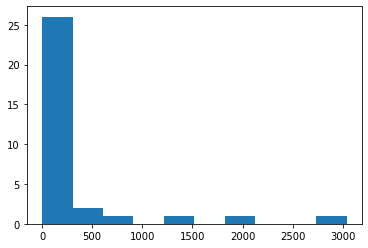

In [ ]:
plt.hist(officer_profile_train["num_allegations"].value_counts())

In [ ]:
officer_profile_train["num_allegations"].value_counts(normalize=True)

1     0.341044
2     0.208310
3     0.140483
4     0.087142
5     0.061089
6     0.045705
7     0.030882
8     0.018529
9     0.014599
10    0.012914
11    0.008310
12    0.007412
13    0.004941
14    0.003706
15    0.003032
16    0.002583
17    0.001797
19    0.001460
18    0.001235
20    0.001011
21    0.000786
25    0.000561
22    0.000337
23    0.000337
24    0.000337
26    0.000337
27    0.000225
29    0.000225
30    0.000225
33    0.000225
32    0.000112
28    0.000112
Name: num_allegations, dtype: float64